Author: Lea Tran-Le (UC Berkeley), https://www.linkedin.com/in/leatranle

# Table of Contents
* [1. Bioinformatics and R](#1.-Bioinformatics-and-R)
    * [1.1 Start with the Iris dataset](#1.1-Start-with-the-Iris-dataset)
    * [1.2 Start with the Body Fat dataset](#1.2-Start-with-the-Body-Fat-dataset)
    * [1.3 Retrieve Sequence Data from NCBI](#1.3-Retrieve-Squence-Data-from-NCBI)
* [2. Bioconductor and R](#2.-Bioconductor-and-R)

# 1.Bioinformatics and R

This notebook takes a practical approach to R to derive biological understanding from large amounts of data. Most biologists can analyze their data using Microsoft Excel or more sophisticated tools such as SPSS but with the increasing usage of large sequencing datasets and computational tools to analyze genomic's data it is necessary to ensure that these automated methods are still as reproducible and robust as any other experimental approaches.
For example after running a RNA-seq there are 10,000's of genes and the level of expression has to be measured across a dozens of samples.
Typical questions are:
- Which genes are differentially expressed over dozen of samples between control tests environment and treatment?
- How can we normalize the RNA-seq counts between samples?
- What is the correct model of statistical error to describe the distribution of counted data across samples? 
- We measure thousands of genes on a only a few dozen samples, how can we perform statistical tests to extract relevant information on a relatively small experimental design?
...
My intern research lab experience at both UCSB Reese lab, Neuroscience Research Institute and undergraduate UC Berkeley Coates Lab, Energy Bioscience Institute have taught me couple of facts:
- bioinformaticians have to rerun an analysis more than once with eventually new or changed data.
- team members be they bioinformaticians collaborators, advisor or software engineers will need to look into your project and understand it. Hence documentint the project in a non cryptic way is essential. It is like keeping a detailed lab notebook.
- Reuse of existing software libraries. writing your own code is always exciting but code quality and speed is the essence here. R, Python have open source libraries that have been tested with a wider audience and consequently have less bugs.

For all the above reasons this project will use jupyter notebook as an authoring tool.Jupyter was designed to enable sharing of notebooks with other people. The idea is that you can write some code, mix some text with the code, and publish this as a notebook.  In the notebook they can see the code as well as the actual results of running the code.

Why R and not Python? I am coming into this jupyter notebook with both a biosciences and pyschology coursework background and practical research lab experiences. Most labs have gained tremendous experimental reproducible research discipline using tools such as SPSS, Excel (yes) and it is only lately that with the increase in big datasets from both high throughput data sequencing and social media big data that the need for more computer sciences engineering driven tools such as Python and R are becoming a necessity.

In this first phase of this project R extensive statistical libraries and documentation is the best tool to have bioinformaticians work with software engineers as a team. In the second phase, as we move into larger data sets and more intensive compute based on machine learning we will use a combination of R and Python.

From a bioinformatics standpoint though the main goal is add collaboration and sharing capabilities such as adding discussions and saved them in the project itself, being able to access and build upon other bioinformatics project. The utlimate end game is to be able to have new team members ramp up faster via collaboration and sharing capabilities.

As in many of my personal previous experience learning by doing practical small projects was the best way for me to learn hence I will be applying the same principles here. 

We will start familiarizing ourselves with R basic scripts by exploring classical internal R data sets such as the Iris and the Body Fat dataset and move the Bioconductor.org datasets

## 1.1 Start with the Iris dataset

The iris data set https://en.wikipedia.org/wiki/Iris_flower_data_set is a favorite example of many R blogggers. The dataset Iris are part of a porfolio of R prebuilt datasets

### Step 1 - Load the Iris by typing:

In [215]:
data(iris)

### Step 2 - Explore the Iris dataset

First check the the size and the structure of the dataset:
- dim() will give the dimension
- names() displays the number of observed variables or attributes
- str() displays the structure and attributes

In [216]:
dim(iris)

[1] 150   5

In [217]:
names(iris)

[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "Species"

In [218]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


the iris dataset consis of 50 samples from each of 3 classes of iris flowers hence the 150 observations. There are 5 attributes:
- sepal length in cm
- sepal width in cm
- petal length in cm
- petat width in cm
- class or species: Iris Setosa, Iris Versicolour and Iris Virginica

In [219]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [220]:
tail(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
145,6.7,3.3,5.7,2.5,virginica
146,6.7,3,5.2,2.3,virginica
147,6.3,2.5,5,1.9,virginica
148,6.5,3,5.2,2,virginica
149,6.2,3.4,5.4,2.3,virginica
150,5.9,3,5.1,1.8,virginica


### Step 3: Explore Individual Variables

#### Distribution

Distribution of every numeric variable can be checked with the function summary(), which returns the minimum, maximum, mean, median and the first (25%) and third(75%) quarties. For factors (or categorical variables), it shows the frequency of every level.

In [221]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

##### Mean, Median, Range, Quartiles and Percentiles

The mean, median and range can also be obtained with functions:
- mean()
- median()
- range()

Quartiles and percentiles are supported by function:
- quantile()

In [222]:
quantile(iris$Sepal.Length)

0%  25%  50%  75% 100% 
 4.3  5.1  5.8  6.4  7.9

In [223]:
quantile(iris$Sepal.Length, c(.1, .3, .65))

10%  30%  65% 
4.80 5.27 6.20

##### Checking Variance, Distribution, Density, Factors (or categories) Frequency

In [224]:
var(iris$Sepal.Length)  # check variance of variable

[1] 0.6856935

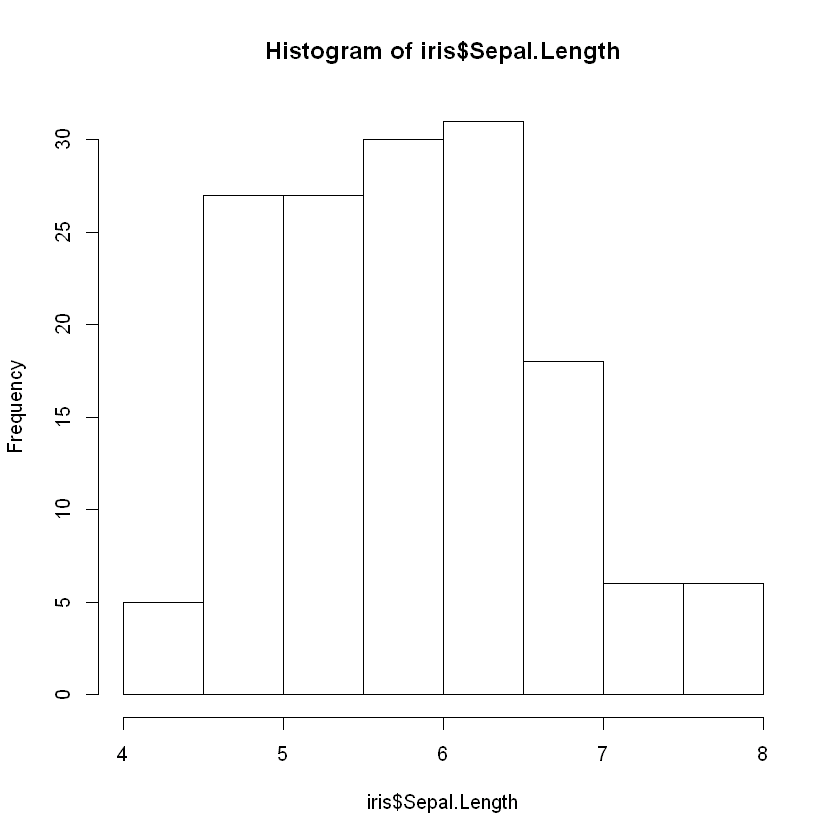

In [225]:
hist(iris$Sepal.Length) # check distribution of variable

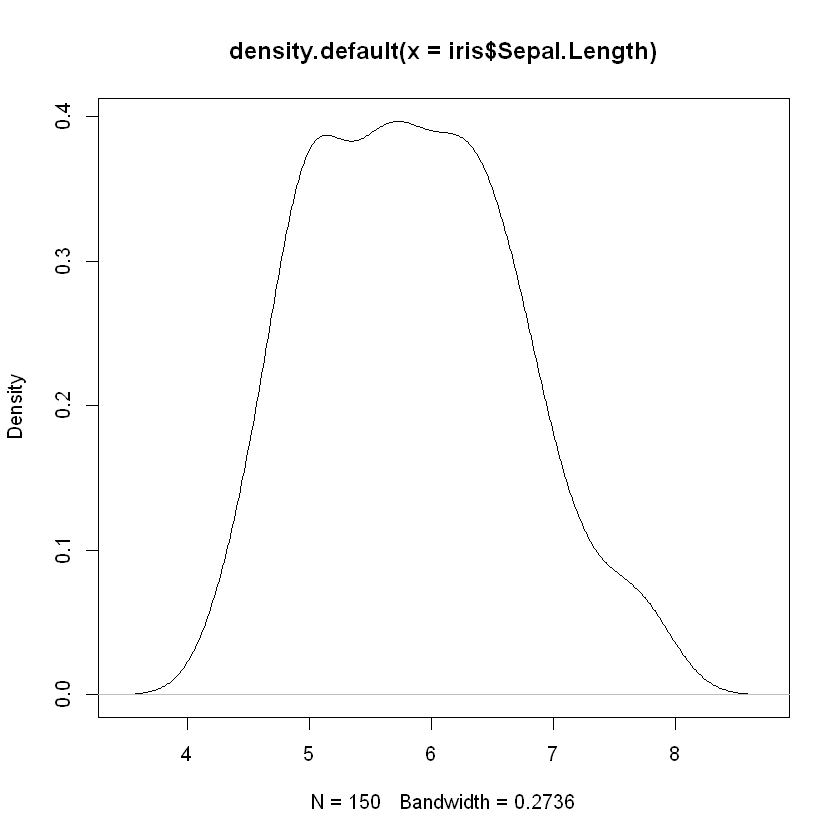

In [226]:
plot(density(iris$Sepal.Length)) # check density of variable

In [227]:
table(iris$Species) # in case variable has factors(categories) displays frequency table


    setosa versicolor  virginica 
        50         50         50 

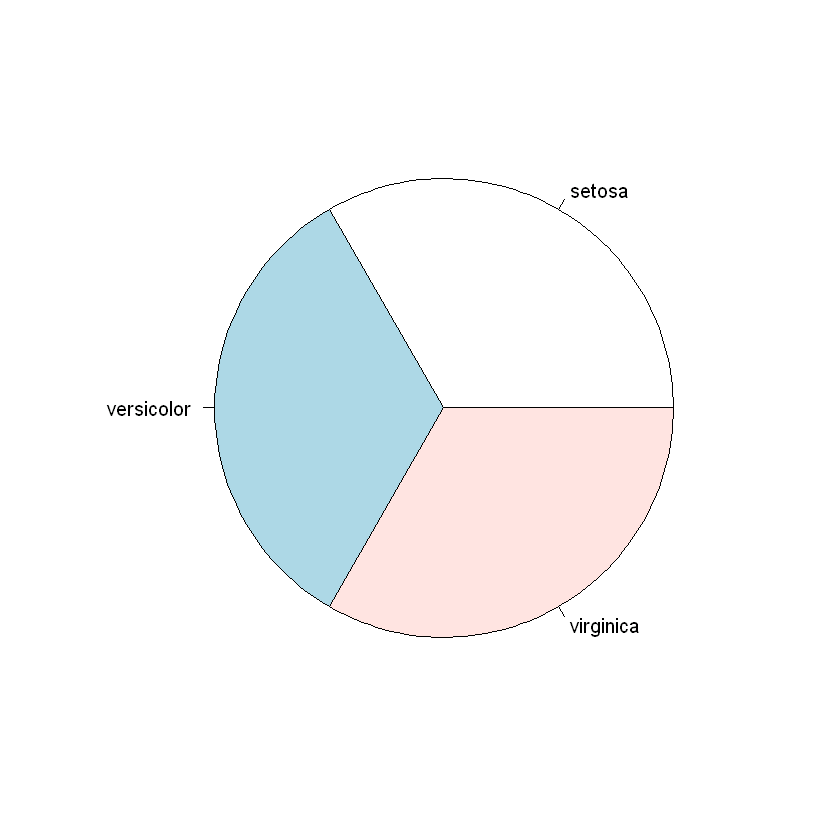

In [228]:
pie(table(iris$Species)) # plot factors frequencies in a pie chart

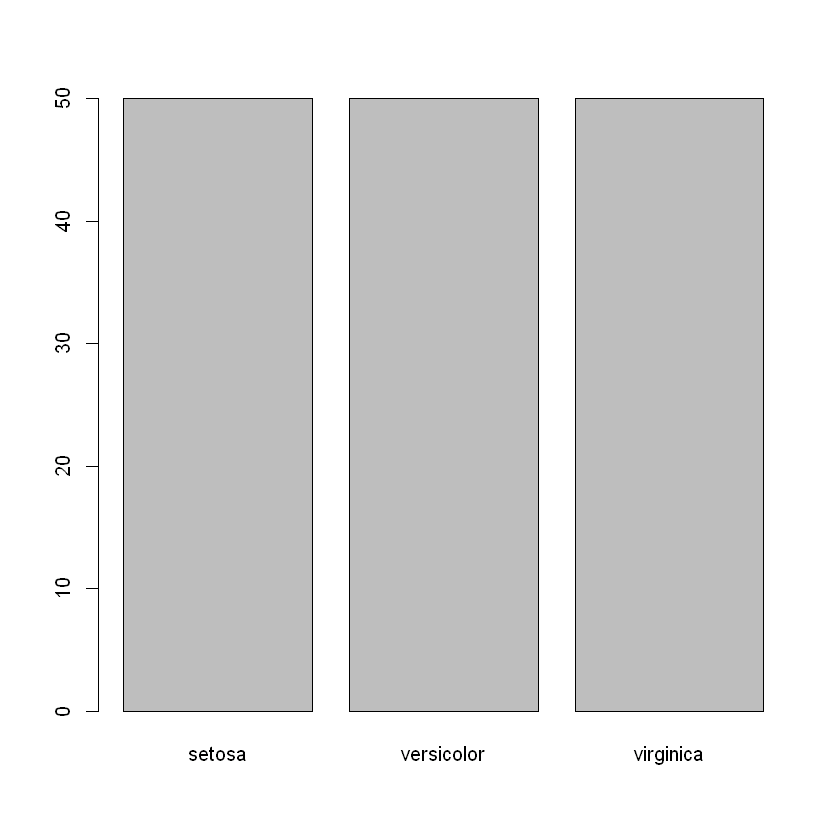

In [229]:
barplot(table(iris$Species))

#### Check outliers using boxplot

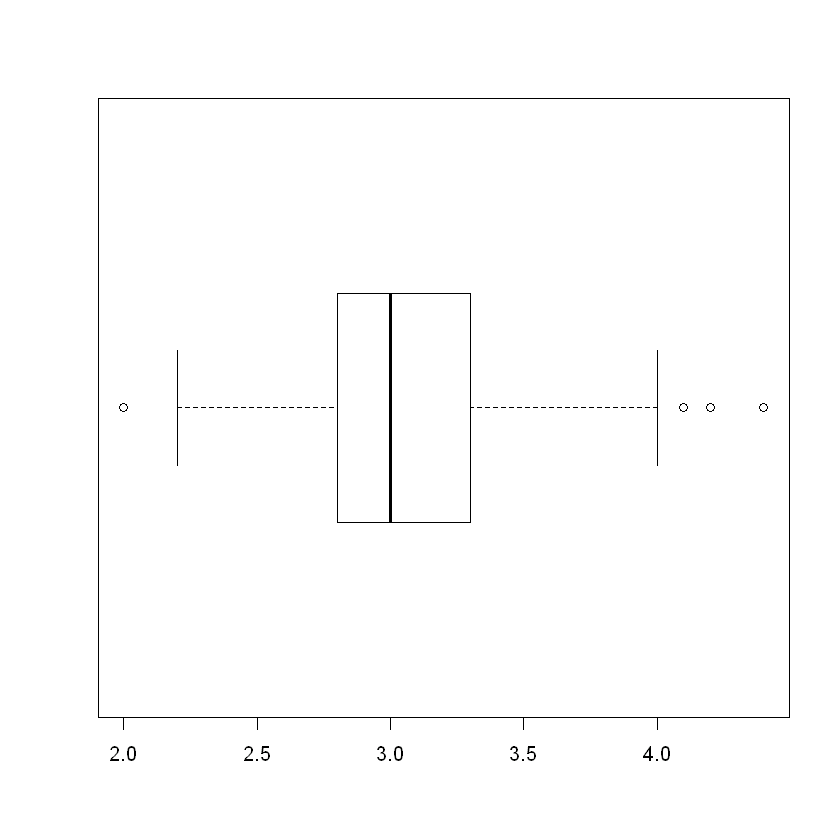

In [230]:
box.Sepal.Width <- boxplot(iris$Sepal.Width, horizontal=T)

In [231]:
box.Sepal.Width # Return Value of boxplot() of variable

2.2
2.8
3
3.3
4
2.935497
3.064503


### Step 4: Explore Multiple Variables

To investigate the relationships between two variables, we will calculate covarariance and correlation between variables with cov() and cor().

In [232]:
cov(iris$Sepal.Length, iris$Petal.Length)

[1] 1.274315

In [233]:
cov(iris[,1:4])

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,0.6856935,-0.0424340,1.2743154,0.5162707
Sepal.Width,-0.0424340,0.1899794,-0.3296564,-0.1216394
Petal.Length,1.2743154,-0.3296564,3.1162779,1.2956094
Petal.Width,0.5162707,-0.1216394,1.2956094,0.5810063


In [234]:
cor(iris[,1:4])

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.0000000,-0.1175698,0.8717538,0.8179411
Sepal.Width,-0.1175698,1.0000000,-0.4284401,-0.3661259
Petal.Length,0.8717538,-0.4284401,1.0000000,0.9628654
Petal.Width,0.8179411,-0.3661259,0.9628654,1.0000000


Calculate the average sepal width by species - we will import the data wrangling R package dplyr for this task.

Note: One of the many benefits of using R is to re-use the trememdous software library created and tested by te R community. In this exercise we will leverage two powerful data wrangling function:
- library(plyr)
- library(dplyr)

In [235]:
library(plyr) # load plyr 1st

In [236]:
library(dplyr) # Load dplyr 2nd

In [237]:
iris %>%
group_by(Species) %>%
summarise(Sepal.Width.Avg = mean(Sepal.Width)) %>%
arrange(Sepal.Width.Avg)

,Sepal.Width.Avg
1,3.057333


Plot Sepal.Width vs Sepal.Length - we will use R library ggplot2

In [238]:
library(ggplot2)

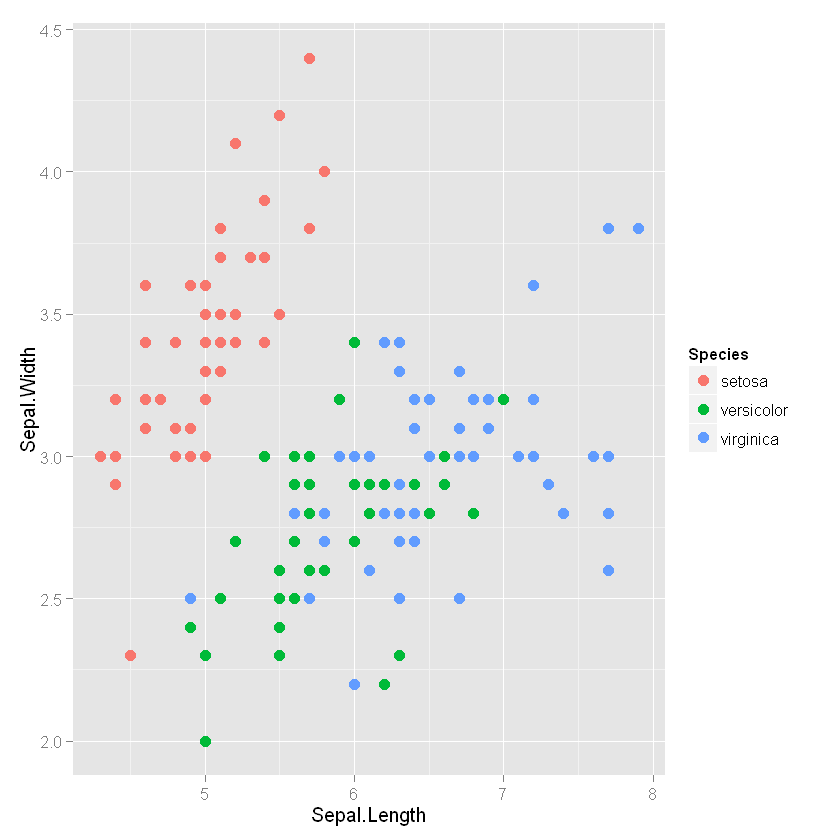

In [239]:
ggplot(data=iris, aes(x=Sepal.Length, y=Sepal.Width, color=Species)) + geom_point(size=3)

### Step 5: Advanced Visualizations - this is optional but just to show the power of R

The iris data set is a favorite example of many R bloggers when writing about R accessors , Data Exporting, Data importing, and for different visualization techniques. You can learn more here: http://www.r-statistics.com/2010/06/clustergram-visualization-and-diagnostics-for-cluster-analysis-r-code/. We will just reuse the clustergram.R code deveoped bu talalili wit other key contributors mentioned in his github. But first we need to find a load a package to source the code directly from Github. Again here the open source community expert is helping. Tony Breyal has post this "source_https" code that will allow us to source the clustergram.r code from github here: https://tonybreyal.wordpress.com/2011/11/24/source_https-sourcing-an-r-script-from-github/

In [240]:
source_https <- function(url, ...) {
  # load package
  require(RCurl)
 
  # parse and evaluate each .R script
  sapply(c(url, ...), function(u) {
    eval(parse(text = getURL(u, followlocation = TRUE, cainfo = system.file("CurlSSL", "cacert.pem", package = "RCurl"))), envir = .GlobalEnv)
  })
}

In [ ]:
source_https("https://raw.github.com/talgalili/R-code-snippets/master/clustergram.r") # sourcing the clustergram.R code from github

From the dataset iris already loaded above with data(iris), we will pick a random number the function set.seed. It sets the seed of R‘s random number generator, which is useful for creating simulations or random objects that can be reproduced.

In [ ]:
set.seed(250) # random number generation

R makes it easy to combine multiple plots into one overall graph, using either the 
par( ) or layout( ) function.
With the par( ) function, you can include the option mfrow=c(nrows, ncols) to create a matrix of nrows x ncols plots that are filled in by row. mfcol=c(nrows, ncols) fills in the matrix by columns.

In [ ]:
par(cex.lab=1.5, cex.main=1.2) #

In [ ]:
data <- scale(iris[,-5]) # notice vectors scaling

In [ ]:
clustergram(data, k.range=2:8, line.width=0.004) # notice how line.width is being used according to the scale of Y

Extract from : http://www.r-statistics.com/2010/06/clustergram-visualization-and-diagnostics-for-cluster-analysis-r-code/
...Looking at the image we can notice a few interesting things. We notice that one of the clusters formed (the lower one) stays as is no matter how many clusters we are allowing (except for one observation that goes way and then beck).
We can also see that the second split is a solid one (in the sense that it splits the first cluster into two clusters which are not “close” to each other, and that about half the observations goes to each of the new clusters).
And then notice how moving to 5 clusters makes almost no difference.
Lastly, notice how when going for 8 clusters, we are practically left with 4 clusters (remember – this is according the mean of cluster centers by the loading of the first component of the PCA on the data)

If I where to take something from this graph, I would say I have a strong tendency to use 3-4 clusters on this data...
I am inviting you to read the rest of the bog and play by yourself. you will discover how clustergrams can help you explore dataset such as Iris.